In [1]:
%matplotlib inline

#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Load files
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")
merged_data = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
merged_data.sample(frac=1).head(10)

,city,driver_count,type,date,fare,ride_id
551,Simpsonburgh,21,Urban,2018-03-31 11:49:06,24.16,9709763173877
530,Loganberg,23,Urban,2018-05-05 17:29:14,30.47,7769257115143
1127,North Barbara,18,Urban,2018-04-10 17:12:30,10.94,355505295148
2334,South Marychester,1,Rural,2018-01-02 11:18:32,52.12,3454018971635
660,Grahamburgh,61,Urban,2018-02-08 13:28:19,10.63,3654329505875
1179,West Josephberg,45,Urban,2018-03-08 21:57:37,9.54,8122518407125
1530,Amandaburgh,12,Urban,2018-04-22 21:34:17,42.52,1901157522591
752,Liumouth,69,Urban,2018-01-18 15:26:16,20.68,984551570260
1554,Williamsview,46,Urban,2018-01-01 14:40:14,5.42,5676167585855
2075,East Danielview,22,Suburban,2018-04-07 06:31:28,18.98,6294116769232


In [3]:
#Obtain key variables
avg_fare_by_city = merged_data.groupby("city").mean()["fare"]
total_rides_by_city = merged_data.groupby("city").count()["ride_id"]
total_drivers_by_city = merged_data.groupby("city").sum()["driver_count"]
city_type = merged_data.groupby("city")["type"]

# Ride sharing bubble plot

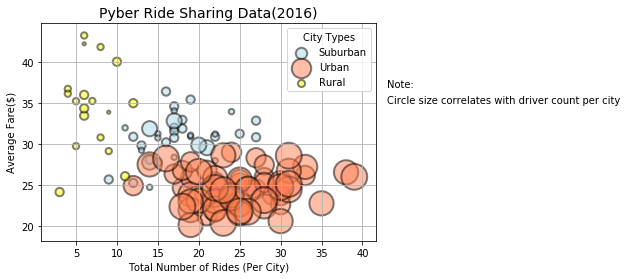

In [10]:
#suburban
suburban = merged_data[(merged_data["type"]=="Suburban")]
suburban_x = suburban.groupby("city").count()["ride_id"]
suburban_y = suburban.groupby("city").mean()["fare"]
suburban_drivers = suburban["driver_count"]
suburban_graph = plt.scatter(suburban_x, suburban_y, alpha = 0.5, s=suburban_drivers*10, c="lightblue", edgecolors="black", linewidth=2, label="Suburban")

#urban
urban = merged_data[(merged_data["type"]=="Urban")]
urban_x = urban.groupby("city").count()["ride_id"]
urban_y = urban.groupby("city").mean()["fare"]
urban_drivers = urban["driver_count"]
urban_graph = plt.scatter(urban_x, urban_y, alpha = 0.5, s=urban_drivers*10, c="coral", edgecolors="black", linewidth=2, label="Urban")

#rural
rural = merged_data[(merged_data["type"]=="Rural")]
rural_x = rural.groupby("city").count()["ride_id"]
rural_y = rural.groupby("city").mean()["fare"]
rural_drivers = rural["driver_count"]
rural_graph = plt.scatter(rural_x, rural_y, alpha = 0.5, s=rural_drivers*10, c="yellow", edgecolors="black", linewidth=2, label="Rural")

plt.title("Pyber Ride Sharing Data(2016)", fontsize=14)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(title = "City Types")
plt.text(43,37, "Note:")
plt.text(43,35, "Circle size correlates with driver count per city")
plt.grid()
plt.savefig("Images/BubblePlot.png")
plt.show()


# Total fares by city type

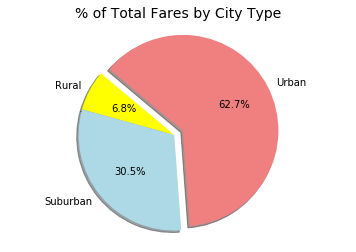

In [11]:
fares_totals = merged_data.groupby("type").sum()["fare"]
colors = ["yellow", "lightblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(fares_totals, labels=fares_totals.index, explode = explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 10})
plt.axis("equal")
plt.title("% of Total Fares by City Type", fontsize=14)
plt.savefig("Images/FaresByCity.png")
plt.show()

# Total rides by city type

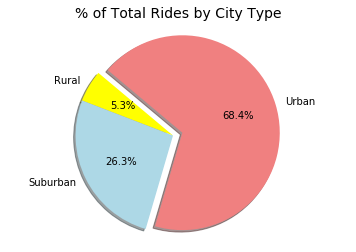

In [12]:
total_rides_by_city_type = merged_data.groupby("type").count()["ride_id"]
colors = ["yellow", "lightblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(total_rides_by_city_type, labels=total_rides_by_city_type.index, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 10})
plt.axis("equal")
plt.title("% of Total Rides by City Type", fontsize=14)
plt.savefig("Images/RidesByCity.png")
plt.show()

# Total drivers by city type

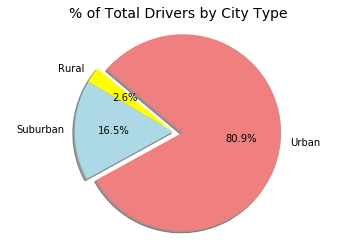

In [13]:
total_drivers_by_city_type = city_data.groupby("type").sum()["driver_count"]
colors = ["yellow", "lightblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(total_drivers_by_city_type, labels=total_drivers_by_city_type.index, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 10})
plt.axis("equal")
plt.title("% of Total Drivers by City Type", fontsize=14)
plt.savefig("Images/DriversByCity.png")
plt.show()